# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from time import time
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(x_train))
print("The MNIST database has a test     set of %d examples." % len(x_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test     set of 10000 examples.


### 2. Visualize the First 24 Training Images

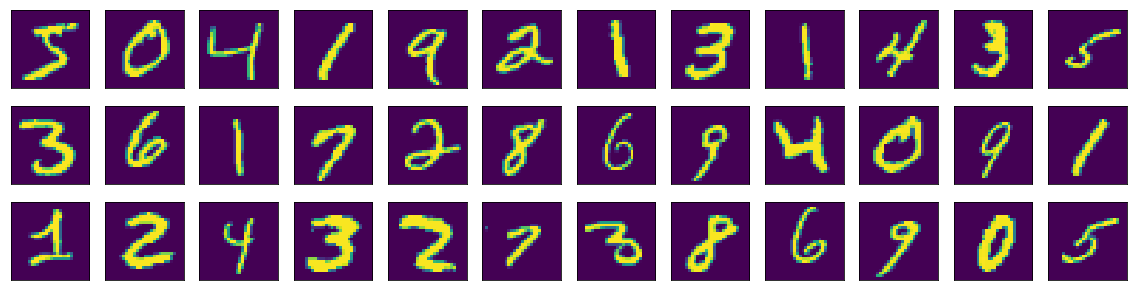

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
x_train = x_train.astype("float32") / 255
x_test  = x_test.astype("float32") / 255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
y_train[0]

5

In [5]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

x_train = np.reshape(x_train, (55000, 28, 28, 1))
x_test  = np.reshape(x_test,  (10000, 28, 28, 1))
x_valid = np.reshape(x_valid, (5000, 28, 28, 1))

print("x_train shape: %s" % str(x_train.shape))
print("y_train shape: %s" % str(y_train.shape))
print("x_test  shape: %s" % str( x_test.shape))
print("y_test  shape: %s" % str( y_test.shape))
print("x_valid shape: %s" % str(x_valid.shape))
print("y_valid shape: %s" % str(y_valid.shape))

x_train shape: (55000, 28, 28, 1)
y_train shape: (55000, 10)
x_test  shape: (10000, 28, 28, 1)
y_test  shape: (10000, 10)
x_valid shape: (5000, 28, 28, 1)
y_valid shape: (5000, 10)


In [6]:
folder = "/home/ubuntu/ml/aind/term_2/6.08-aind2-cnn/cifar10-classification/try/"

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

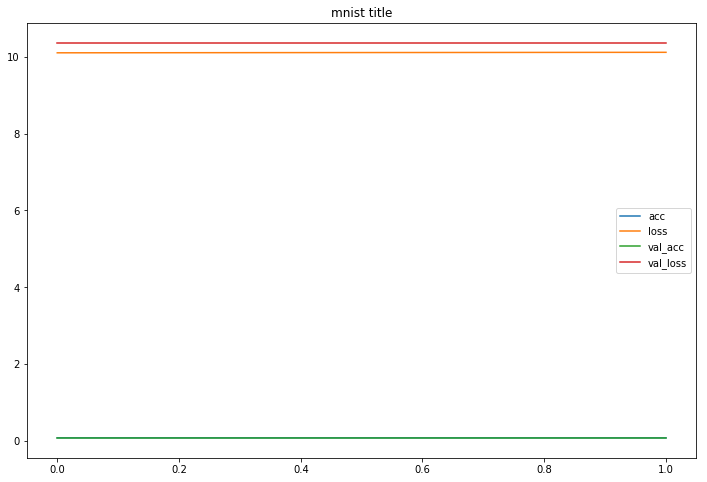

Test accuracy: 0.0744
time spent: 64.37675642967224


In [7]:
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping


model_1 = Sequential()
model_1.add(Conv2D(filters=16, kernel_size=2, padding="same", input_shape=(28, 28, 1)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(filters=32, kernel_size=2, padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(filters=64, kernel_size=2, padding="same"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(units=10))

model_1.summary()

model_1.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

start = time()

if os.path.exists(folder + "model_mnist.test_1"):
    os.remove(folder + "model_mnist.test_1")

if os.path.exists(folder + "model_mnist.test_1") == False:

    checkpointer = ModelCheckpoint(filepath=folder + "model_mnist.test_1", verbose=1, save_best_only=True)
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

    hist_1 = model_1.fit(x_train, y_train,
                         batch_size=32, epochs=50,
                         validation_data=(x_valid, y_valid),
                         callbacks=[checkpointer, earlystop],
                         verbose=2, shuffle=True)

    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.figure(figsize=(12, 8))
    plt.plot(hist_1.history["acc"], label="acc")
    plt.plot(hist_1.history["loss"], label="loss")
    plt.plot(hist_1.history["val_acc"], label="val_acc")
    plt.plot(hist_1.history["val_loss"], label="val_loss")
    plt.legend()
    plt.title("mnist title")
    plt.show()


model_1.load_weights(folder + "model_mnist.test_1")
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print("time spent: %s" % (time() - start))

---

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,930
Trainable params: 7,930
Non-trainable params: 0
_________________________________________________________________
Train on

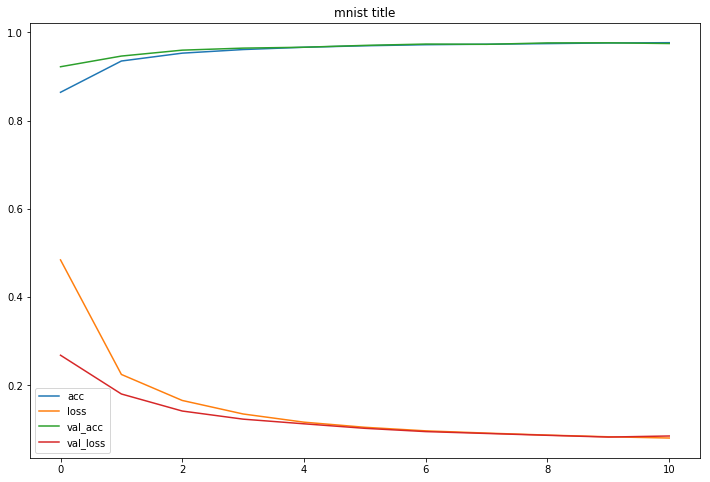

Test accuracy: 0.9745
time spent: 255.44492721557617


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.pooling import GlobalAveragePooling2D

model_2 = Sequential()
model_2.add(Conv2D(filters=16, kernel_size=2, padding='same', activation=None, input_shape=(28, 28, 1)))
model_2.add(LeakyReLU(alpha=0.3))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

model_2.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

if os.path.exists(folder + "model_mnist.test_2"):
    os.remove(folder + "model_mnist.test_2")

start = time()

if os.path.exists(folder + "model_mnist.test_2") == False:
    from keras.callbacks import ModelCheckpoint

    checkpointer = ModelCheckpoint(filepath=folder + "model_mnist.test_2", verbose=1, save_best_only=True)
    earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

    hist_2 = model_2.fit(x_train, y_train,
                         batch_size=32, epochs=50,
                         validation_data=(x_valid, y_valid),
                         callbacks=[checkpointer, earlystop],
                         verbose=2, shuffle=True)

    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.figure(figsize=(12, 8))
    plt.plot(hist_2.history["acc"], label="acc")
    plt.plot(hist_2.history["loss"], label="loss")
    plt.plot(hist_2.history["val_acc"], label="val_acc")
    plt.plot(hist_2.history["val_loss"], label="val_loss")
    plt.legend()
    plt.title("mnist title")
    plt.show()


model_2.load_weights(folder + "model_mnist.test_2")
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print("time spent: %s" % (time() - start))